In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('Image_Classification/Train/sarees/sarees_2.jpg')

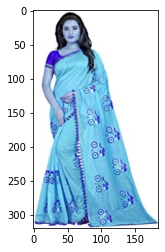

In [3]:
plt.imshow(img)

In [4]:
img.shape

(320, 184, 3)

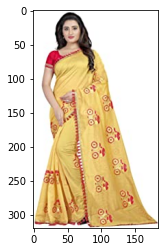

In [5]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
# defining Width and Height
width,height = 224,224

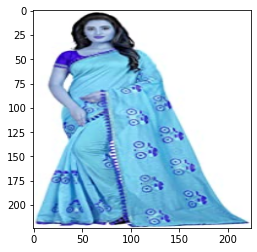

In [7]:
img_resize = cv2.resize(img,(width,height))
plt.imshow(img_resize)

In [8]:
img_resize.shape

(224, 224, 3)

In [5]:
# Initializing ImageDataGenerator to import data with 1/255 scalling, and data augmentation for Train Dataset and Test Dataset

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Importing train data using flow from directory

train_set = train_datagen.flow_from_directory('Image_Classification/Train/',target_size=(width,height),batch_size=32,
                                              class_mode='categorical')



Found 1200 images belonging to 3 classes.


In [7]:
test_set = test_datagen.flow_from_directory('Image_Classification/Test/',target_size=(width,height),batch_size=5,
                                            class_mode='categorical')

Found 104 images belonging to 3 classes.


In [8]:
# useful for getting number of classes
folders = glob('Image_Classification/Train/*')

In [15]:
folders

['Image_Classification/Train\\men_jeans',
 'Image_Classification/Train\\men_trousers',
 'Image_Classification/Train\\sarees']

In [48]:
# Creating a sequential model
model_seq = Sequential()

# adding convolution layers

model_seq.add(Conv2D(input_shape=(224,224,3), filters=64,kernel_size=(3,3), padding='same', activation='relu'))

model_seq.add(Conv2D(filters=64, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(MaxPool2D(pool_size=(2,2),strides =(2,2)))
 
model_seq.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model_seq.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(MaxPool2D(pool_size=(2,2),strides =(2,2)))

model_seq.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model_seq.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(MaxPool2D(pool_size=(2,2),strides =(2,2)))

model_seq.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model_seq.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation="relu"))

model_seq.add(MaxPool2D(pool_size=(2,2),strides =(2,2)))

# Flattening the data
model_seq.add(Flatten())

# Adding fully connected layers

model_seq.add(Dense(256, activation = 'relu'))

model_seq.add(Dense(512, activation = 'relu'))

model_seq.add(Dense(1024, activation = 'relu'))

model_seq.add(Dense(2048, activation = 'relu'))

model_seq.add(Dense(4096, activation = 'relu'))

model_seq.add(Dense(len(folders), activation = 'softmax'))

In [49]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model_seq.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model_seq.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)      

In [29]:
# fit the model
seq_model = model_seq.fit(train_set,validation_data=test_set,epochs=20)

Epoch 1/20
38/38 [==============================] - 305s 8s/step - loss: 1.1492 - accuracy: 0.3300 - val_loss: 1.0996 - val_accuracy: 0.2885
Epoch 2/20
38/38 [==============================] - 305s 8s/step - loss: 1.0959 - accuracy: 0.3833 - val_loss: 1.1209 - val_accuracy: 0.4615
Epoch 3/20
38/38 [==============================] - 305s 8s/step - loss: 1.0071 - accuracy: 0.5142 - val_loss: 1.0608 - val_accuracy: 0.3462
Epoch 4/20
38/38 [==============================] - 306s 8s/step - loss: 0.8109 - accuracy: 0.5833 - val_loss: 0.8329 - val_accuracy: 0.5673
Epoch 5/20
38/38 [==============================] - 305s 8s/step - loss: 0.6646 - accuracy: 0.6133 - val_loss: 0.5969 - val_accuracy: 0.7019
Epoch 6/20
38/38 [==============================] - 304s 8s/step - loss: 0.6165 - accuracy: 0.6267 - val_loss: 0.5914 - val_accuracy: 0.6250
Epoch 7/20
38/38 [==============================] - 305s 8s/step - loss: 0.5852 - accuracy: 0.6150 - val_loss: 0.5319 - val_accuracy: 0.6923
Epoch 8/20
38

In [25]:
# fit the model
seq_model = model_seq.fit(train_set,validation_data=test_set,epochs=20)

Epoch 1/20
38/38 [==============================] - 142s 4s/step - loss: 1.1016 - accuracy: 0.3175 - val_loss: 1.0980 - val_accuracy: 0.3654
Epoch 2/20
38/38 [==============================] - 141s 4s/step - loss: 1.0993 - accuracy: 0.3150 - val_loss: 1.0983 - val_accuracy: 0.3462
Epoch 3/20
38/38 [==============================] - 141s 4s/step - loss: 1.0991 - accuracy: 0.3133 - val_loss: 1.0981 - val_accuracy: 0.3462
Epoch 4/20
38/38 [==============================] - 141s 4s/step - loss: 1.0990 - accuracy: 0.3050 - val_loss: 1.0986 - val_accuracy: 0.3462
Epoch 5/20
38/38 [==============================] - 140s 4s/step - loss: 1.0988 - accuracy: 0.3017 - val_loss: 1.0986 - val_accuracy: 0.3654
Epoch 6/20
38/38 [==============================] - 139s 4s/step - loss: 1.0988 - accuracy: 0.3000 - val_loss: 1.0985 - val_accuracy: 0.3654
Epoch 7/20
38/38 [==============================] - 136s 4s/step - loss: 1.0986 - accuracy: 0.3267 - val_loss: 1.0986 - val_accuracy: 0.3462
Epoch 8/20
38

In [51]:
# fit the model
seq_model = model_seq.fit(train_set,validation_data=test_set,epochs=30)

Epoch 1/30
38/38 [==============================] - 313s 8s/step - loss: 1.2840 - accuracy: 0.3333 - val_loss: 1.0974 - val_accuracy: 0.3462
Epoch 2/30
38/38 [==============================] - 312s 8s/step - loss: 1.1187 - accuracy: 0.3425 - val_loss: 1.1044 - val_accuracy: 0.3462
Epoch 3/30
38/38 [==============================] - 310s 8s/step - loss: 0.9399 - accuracy: 0.4725 - val_loss: 0.7013 - val_accuracy: 0.5865
Epoch 4/30
38/38 [==============================] - 309s 8s/step - loss: 0.6442 - accuracy: 0.6158 - val_loss: 0.5939 - val_accuracy: 0.6538
Epoch 5/30
38/38 [==============================] - 307s 8s/step - loss: 0.5935 - accuracy: 0.6383 - val_loss: 0.5496 - val_accuracy: 0.6538
Epoch 6/30
38/38 [==============================] - 306s 8s/step - loss: 0.6330 - accuracy: 0.6350 - val_loss: 0.6931 - val_accuracy: 0.5962
Epoch 7/30
38/38 [==============================] - 305s 8s/step - loss: 0.6866 - accuracy: 0.6250 - val_loss: 0.6249 - val_accuracy: 0.6346
Epoch 8/30
38

In [14]:
def plot_metric(model, metric):
    train_metrics = model.history[metric]
    val_metrics = model.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

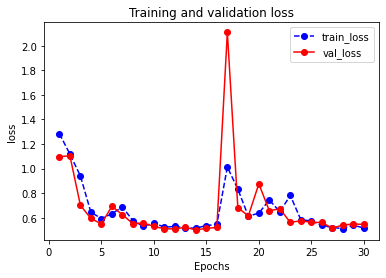

In [52]:
plot_metric(seq_model, 'loss')

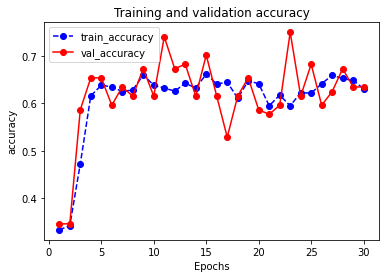

In [53]:
plot_metric(seq_model, 'accuracy')

# Plotting the model as image

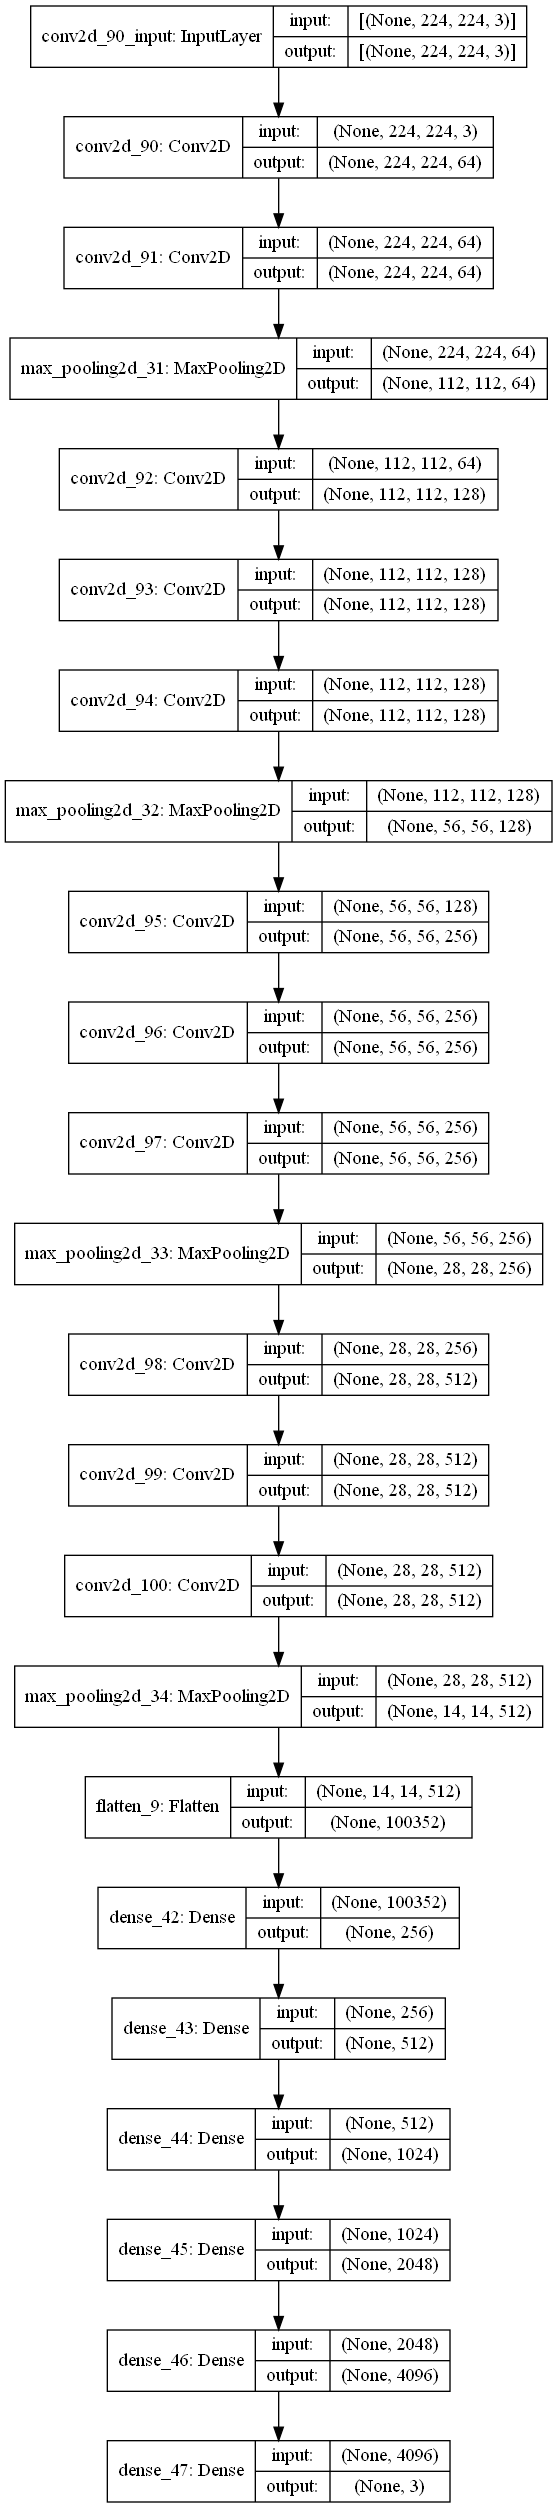

In [55]:
plot_model(model_seq,show_shapes=True, show_layer_names=True)

# Using VGG16 architecture

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Image_Classification/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model_vgg = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
vgg_model = model_vgg.fit(train_set,validation_data=test_set,epochs=10)

Epoch 1/10
38/38 [==============================] - 79s 2s/step - loss: 0.5342 - accuracy: 0.7600 - val_loss: 0.4958 - val_accuracy: 0.7500
Epoch 2/10
38/38 [==============================] - 80s 2s/step - loss: 0.2686 - accuracy: 0.8750 - val_loss: 0.1607 - val_accuracy: 0.9423
Epoch 3/10
38/38 [==============================] - 82s 2s/step - loss: 0.1908 - accuracy: 0.9158 - val_loss: 0.1227 - val_accuracy: 0.9615
Epoch 4/10
38/38 [==============================] - 82s 2s/step - loss: 0.1947 - accuracy: 0.9092 - val_loss: 0.1446 - val_accuracy: 0.9519
Epoch 5/10
38/38 [==============================] - 80s 2s/step - loss: 0.1414 - accuracy: 0.9392 - val_loss: 0.0938 - val_accuracy: 0.9808
Epoch 6/10
38/38 [==============================] - 81s 2s/step - loss: 0.1289 - accuracy: 0.9508 - val_loss: 0.0831 - val_accuracy: 0.9712
Epoch 7/10
38/38 [==============================] - 81s 2s/step - loss: 0.1179 - accuracy: 0.9508 - val_loss: 0.0966 - val_accuracy: 0.9615
Epoch 8/10
38/38 [==

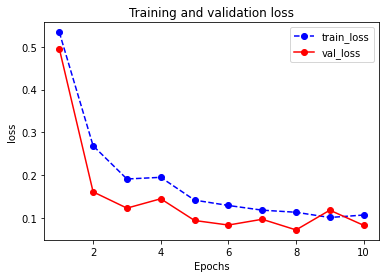

In [16]:
plot_metric(vgg_model, 'loss')

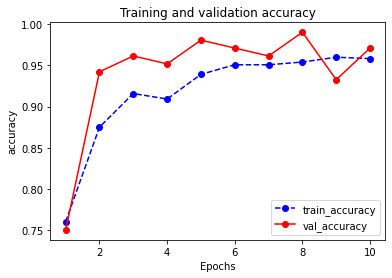

In [17]:
plot_metric(vgg_model, 'accuracy')

In [37]:
from tensorflow.keras.utils import plot_model

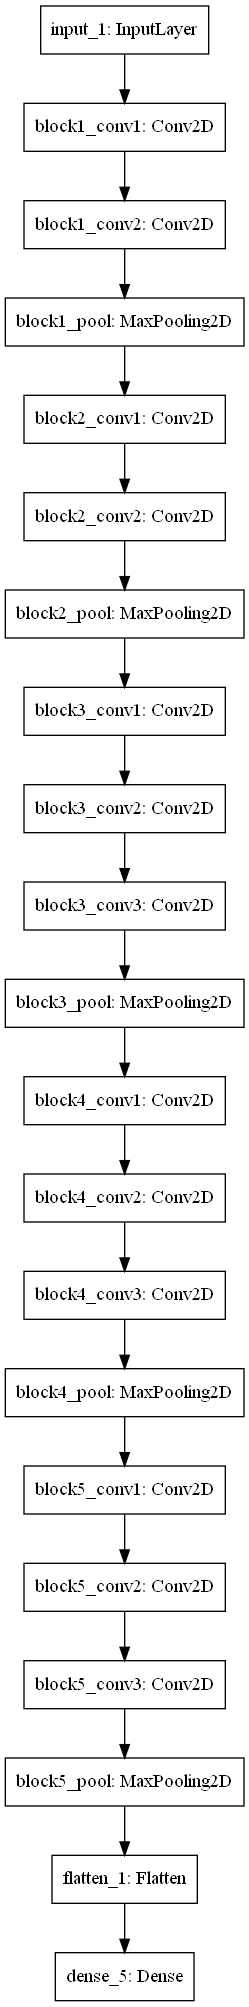

In [39]:
plot_model(model_vgg)

# Using Resnet Architecture

In [32]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [34]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Image_Classification/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model_res = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model_res.summary()

94773248/94765736 [==============================] - 29s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [35]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model_res.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
res_model = model_res.fit(train_set,validation_data=test_set,epochs=10)

Epoch 1/10
38/38 [==============================] - 84s 2s/step - loss: 0.6093 - accuracy: 0.7342 - val_loss: 0.2338 - val_accuracy: 0.9327
Epoch 2/10
38/38 [==============================] - 84s 2s/step - loss: 0.2555 - accuracy: 0.8833 - val_loss: 0.2325 - val_accuracy: 0.8942
Epoch 3/10
38/38 [==============================] - 83s 2s/step - loss: 0.2104 - accuracy: 0.9117 - val_loss: 0.1467 - val_accuracy: 0.9519
Epoch 4/10
38/38 [==============================] - 83s 2s/step - loss: 0.1723 - accuracy: 0.9258 - val_loss: 0.1405 - val_accuracy: 0.9231
Epoch 5/10
38/38 [==============================] - 82s 2s/step - loss: 0.1452 - accuracy: 0.9467 - val_loss: 0.1042 - val_accuracy: 0.9615
Epoch 6/10
38/38 [==============================] - 87s 2s/step - loss: 0.1138 - accuracy: 0.9583 - val_loss: 0.0893 - val_accuracy: 0.9712
Epoch 7/10
38/38 [==============================] - 84s 2s/step - loss: 0.1291 - accuracy: 0.9467 - val_loss: 0.1828 - val_accuracy: 0.8942
Epoch 8/10
38/38 [==

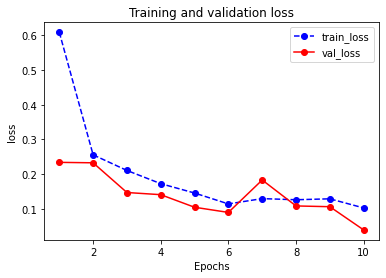

In [56]:
plot_metric(res_model, 'loss')

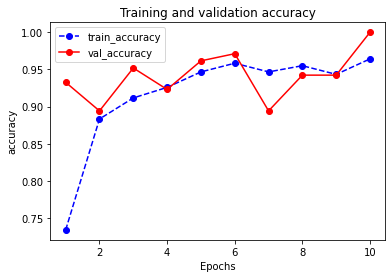

In [58]:
plot_metric(res_model, 'accuracy')